## Bar products Classification using Transfer Learning | Deep Learning Project

In [2]:
import os
import numpy as np
import pandas as pd
import cv2 
import glob
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
from zipfile import ZipFile
import keras
from keras.preprocessing.image import ImageDataGenerator
from skimage import io

> Extracting Dataset using Kaggle API/ <br/>
>  **Collecting**& **Creating Data** from: Google,Roboflow,Hugging Face,'Take pictures of products'. </br>
>Importing the Dog vs Cat Dataset from Kaggle </br>
[Link Kaggle](https://www.kaggle.com/datasets/filhypedeeplearning/coffee-images 'Kaggle-Coffe Dataset')

In [3]:
!kaggle datasets download -d filhypedeeplearning/coffee-images

401 - Unauthorized


>If you encounter a "401 - Unauthorized" error message on Kaggle, it means that you are not authorized to access the requested resource or page. This could happen if you are trying to access a private dataset or competition page without being logged in, or if you are trying to access a page that requires a higher level of permissions than your account currently has.

>To resolve this issue, try logging in to your Kaggle account and make sure that you have the necessary permissions to access the resource you are trying to reach. If you are still unable to access the resource, you may need to contact Kaggle support for further assistance.

### Etracting the compressed dataset

In [4]:
dataset = 'coffee-images.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset is extracted')

The dataset is extracted


### Take pictures of products 
> Here is the Dataset that i made by myself and combine with the kaggle dataset </br>
[My data in Google Drive](https://drive.google.com/drive/folders/1VxCEz-91TYZS2z1Ksya4lXh2-PGjPnYT "The Data")

### Counting the number of images on the Dataset

In [5]:
path, dirs, files = next(os.walk('beverage-classification/AllData/Corona/'))
file_counts = len(files)
print(f'Number of images on this dataset is : {file_counts}')

Number of images on this dataset is : 137


In [6]:
# Printing all file names in the direcotry
file_names = os.listdir('Train_Data1/')
# print(file_names)

### Data augmentation using Keras: to increase the variety of images in our dataset and reduce overfitting 
* This function uses Keras Data Augmentation to generate new images for a given set of images. The function applies various image transformation techniques such as rotation, shifting, shearing, zooming and flipping to create augmented versions of the input images. The augmented images are saved to a specified output directory for further processing or analysis. The purpose of data augmentation is to increase the size of the training set and reduce overfitting, which can improve the accuracy and robustness of machine learning models. This function is particularly useful in cases where the available training data is limited or imbalanced.


In [7]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant', cval=125)

image_directory = 'AllData/Corona/'
SIZE = 244
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(os.path.join(image_directory, image_name))
        image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))

x = np.array(dataset)
x = x.reshape((-1, SIZE, SIZE, 3))  # Reshape to (num_samples, height, width, channels)

output_dir = 'C_DataAugmentation/'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

i = 0
for batch in datagen.flow(x, batch_size=16, 
                          save_to_dir=output_dir,
                          save_prefix='',
                          save_format='jpg'):
    i += 1
    if i > 30:
        break

When building a model for computer vision tasks, such as image classification or object detection, it's important to ensure that all the images are in the same format for several reasons:

Consistency: Keeping all the images in the same format ensures that they have a consistent size, resolution, and color space. This is important because the model expects all the images to be of the same format, and any variation in the format can lead to inconsistencies in the output.

Efficiency: Processing images in different formats requires additional time and computational resources. By keeping the images in the same format, we can optimize the processing pipeline to ensure maximum efficiency.

Standardization: Having a standardized format makes it easier to compare and share the dataset with other researchers, as they will know exactly what format the images are in and how they were preprocessed.

In [ ]:
# Set the directory path containing the JPEG images
directory = "/path/to/directory"

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.jpeg')or filename.endswith(".jpeg") or filename.endswith(".png") or filename.endswith(".webp"):
        # Construct the old and new filenames
        old_filepath = os.path.join(directory, filename)
        new_filepath = os.path.join(directory, filename[:-5] + '.jpg')
        
        # Rename the file
        os.rename(old_filepath, new_filepath)

#### After we collected the data the images propably would have diferent names
> let's write a function that __rename__ the images in a directory

In [19]:
dir = "espresso_macchiato_DataAugmentation/"

files = os.listdir(dir)
New_name = input('Enter New name:')

counter = 1
for file in files:
    filename = os.path.join(dir, file)
    file_ext = os.path.splitext(filename)[1]
    new_name = os.path.join(dir, f'{New_name}_{counter}{file_ext}')
#     print('Completed')
    os.rename(filename, new_name)
    counter += 1

Enter New name:Espresso_macchiato


### Displaying the images

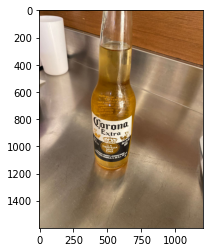

In [14]:
img = mpimg.imread('AllData/Corona/Corona_10.jpg')
img = plt.imshow(img)
plt.show()

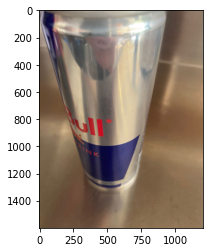

In [15]:
img = mpimg.imread('AllData/RedBull/RedBull_112.jpg')
img = plt.imshow(img)
plt.show()

`Resize the images for a better performance `

After we do the processing in products were putting all the data in one folder example:Train_Data

In [16]:
input_folder = "espresso_macchiato_DataAugmentation/"
# input_folder =  "/path/to/directory"
output_folder = "Train_Data/"
# output_folder ="/path/to/directory"
target_size = (224, 224) # Specify your target size here

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for filename in os.listdir(input_folder):
    input_path = os.path.join(input_folder, filename)
    output_path = os.path.join(output_folder, filename)
    with Image.open(input_path) as img:
        img = img.resize(target_size)
        img.save(output_path)

`Counting the images for a direcotory and let's see how many training data we have`

In [20]:
from collections import Counter
import os

file_names = os.listdir('Train_Data/')
name_counts = Counter(name[:4] for name in file_names)

categories = {'Espr': 'espresso', 'Macc': 'macchiato', 'Coca': 'cocacola', 'Coro': 'corona', 'RedB': 'RedBull', 'Spri': 'sprite'}

for name, count in name_counts.items():
    category = categories[name]
    print(f'The number of {category} images = {count}')

total_count = sum(name_counts.values())
print(f'The sum of all images is: {total_count}')

The number of corona images = 475
The number of cocacola images = 466
The number of sprite images = 484
The number of macchiato images = 490
The number of espresso images = 476
The number of RedBull images = 484
The sum of all images is: 2875


#### Displaying the resized images

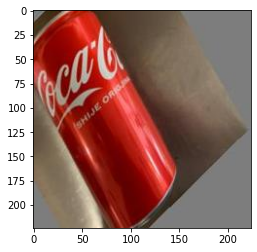

In [21]:
img = mpimg.imread('Train_Data/Coca-Cola_100.jpg')
img = plt.imshow(img)
plt.show()

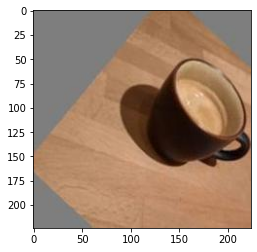

In [22]:
img = mpimg.imread('Train_Data/EspressoCoffe_103.jpg')
img = plt.imshow(img)

### Creating a for loop to assign labels

In [23]:
label_map = {'Espr': 0, 'Macc': 1, 'Coca': 2, 'RedB': 3, 'Spri': 4, 'Coro': 5}

labels = [label_map[i[:4]] for i in os.listdir('Train_Data/')]

#  Printing the labels 
# print(labels)
# len(labels)

In [24]:
# counting the images of products

values , counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1 2 3 4 5]
[476 490 466 484 484 475]


`Converting all the resized images to numpy arrays`

In [25]:
image_directory = 'Train_Data/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

bar_products = np.asarray([cv2.imread(file) for file in files])
# print(bar_products)
# type(bar_products)

In [26]:
X = bar_products
Y = np.asarray(labels)

### Train Test Split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(2875, 224, 224, 3) (2300, 224, 224, 3) (575, 224, 224, 3)


> 2300 ---> Training images </br>
> 575  ---> Test images

`Scaling the data`

In [29]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

print(X_train_scaled)</br>
the sacling part its used for activation function because sigmoid and Relu are 0-->1 and the work better around 0 and 1

### Building the Neural Network

In [31]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [32]:
number_of_classes = 6

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(number_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


In [33]:
model.compile(
    optimizer= 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics= ['acc']
)

In [34]:
history = model.fit(X_train_scaled,Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
65/65 [==============================] - 23s 325ms/step - loss: 0.8692 - acc: 0.7019 - val_loss: 0.3920 - val_acc: 0.9043
Epoch 2/10
65/65 [==============================] - 20s 309ms/step - loss: 0.2628 - acc: 0.9430 - val_loss: 0.2426 - val_acc: 0.9304
Epoch 3/10
65/65 [==============================] - 20s 311ms/step - loss: 0.1611 - acc: 0.9696 - val_loss: 0.1667 - val_acc: 0.9696
Epoch 4/10
65/65 [==============================] - 20s 309ms/step - loss: 0.1098 - acc: 0.9889 - val_loss: 0.1271 - val_acc: 0.9870
Epoch 5/10
65/65 [==============================] - 20s 309ms/step - loss: 0.0824 - acc: 0.9913 - val_loss: 0.1068 - val_acc: 0.9870
Epoch 6/10
65/65 [==============================] - 20s 313ms/step - loss: 0.0624 - acc: 0.9961 - val_loss: 0.0912 - val_acc: 0.9826
Epoch 7/10
65/65 [==============================] - 20s 310ms/step - loss: 0.0508 - acc: 0.9971 - val_loss: 0.0836 - val_acc: 0.9870
Epoch 8/10
65/65 [==============================] - 20s 309ms/step - 

In [35]:
score, acc = model.evaluate(X_test_scaled,Y_test)
print(f'Test Loss= {score}')
print(f'Test Accuracy= {acc}')

18/18 [==============================] - 5s 275ms/step - loss: 0.0791 - acc: 0.9757
Test Loss= 0.07908511161804199
Test Accuracy= 0.9756521582603455


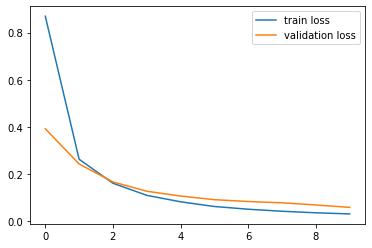

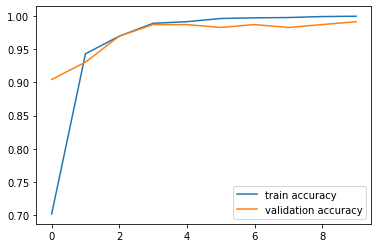

In [36]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [28]:
input_image_path = input('Path of image to be predicted')
input_image = cv2.imread(input_image_path)

# cv2.imshow('type', input_image)
# cv2.waitKey()

input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print(input_prediction)
if input_pred_label == 0:
    print('This image represent Coffe espresso')
elif input_pred_label == 1:
    print('The image represent Coffe macchiato')
elif input_pred_label == 2:
    print('The image represent Coca-Cola')
elif input_pred_label == 3:
    print('The image represent RedBull')
elif input_pred_label == 4:
    print('The image represent Sprite')
elif input_pred_label == 5:
    print('The image represent Corona ')


Path of image to be predicted/home/xhulio/Downloads/Caramel-Macchiato-1.jpg
1/1 [==============================] - 0s 267ms/step
[[-1.4364543  2.3420525 -2.3570902 -2.919526  -4.5820875 -2.7159212]]
The image represent Coffe macchiato


> In this drive folder you can find images to test that model has never seen before [Test_Imges](https://drive.google.com/drive/folders/1S2W0HEU_Z4pF3l7mGui0JK5RskSGv3FV?usp=sharing 'Photos to test')